In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv(r'/Users/rithwikvamshi/Desktop/Telco-Customer-Churn.csv')

In [3]:
data.head().T #displaying first 5 rows of data transposed.

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
data['SeniorCitizen']=pd.Categorical(data['SeniorCitizen']) #converting SeniorCitizen from int to Category.
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors="coerce")# converting TotalCharges to num.
del data["customerID"]
data.dtypes

gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [5]:
data = data.dropna() #dropping the data having null values.
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
numerics = ['float64', 'int64']
numeric_ds = data.select_dtypes(include=numerics)# seperating numeric type values.
objects_ds = data.select_dtypes(exclude=numerics)# seperating non-numeric type values.

In [7]:
numeric_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7032 non-null   int64  
 1   MonthlyCharges  7032 non-null   float64
 2   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 219.8 KB


In [8]:
numeric_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [9]:
objects_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  Churn             7032 n

In [10]:
objects_ds.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [11]:
data.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

In [12]:
#Analysing The Numerical DATA

[]

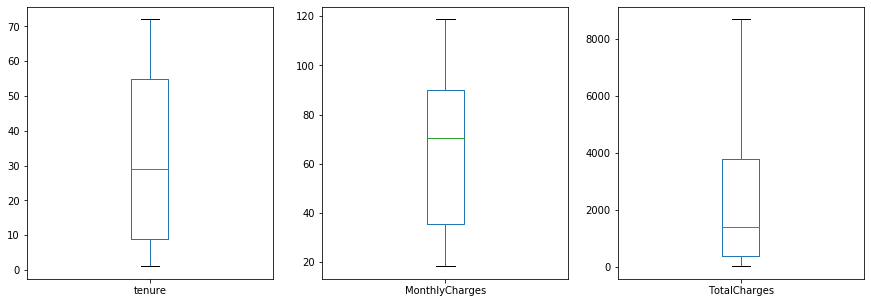

In [13]:
# box plots
numeric_ds.plot(kind='box', subplots=True, figsize=(15,5))
plt.plot()

[]

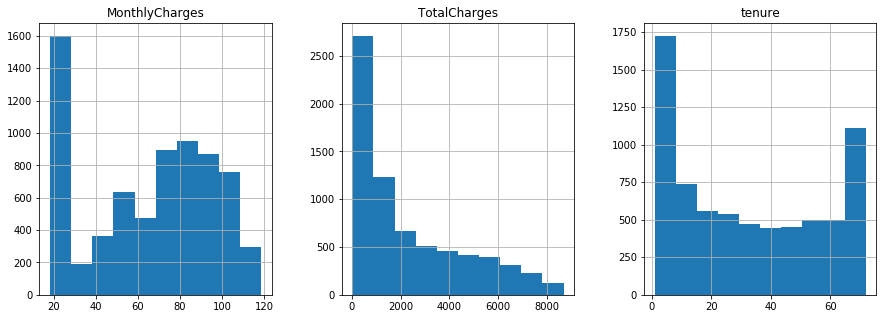

In [14]:
# histogram plots
numeric_ds.hist(layout=(1,3), figsize=(15,5)) #x-axis value y-axis number of coustmers
plt.plot()

In [15]:
#Now Lets Compare the each numeric values with churn(our prediction Variable)
#lets add the churn variable to dataset
numeric_ds = pd.concat([numeric_ds,data["Churn"]],axis=1)

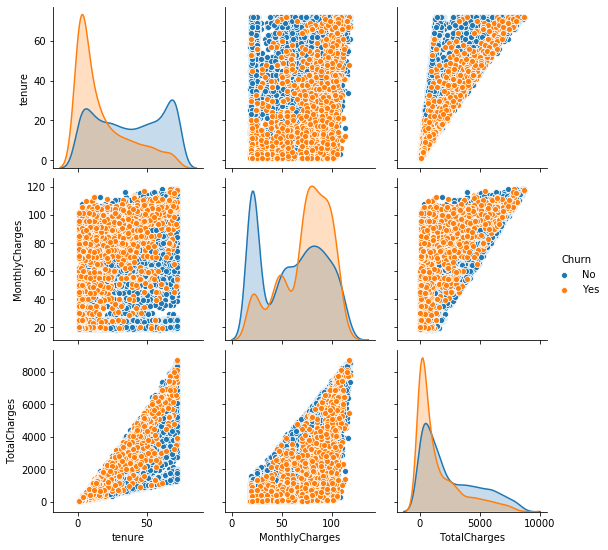

In [16]:
sns.pairplot(numeric_ds,hue='Churn')

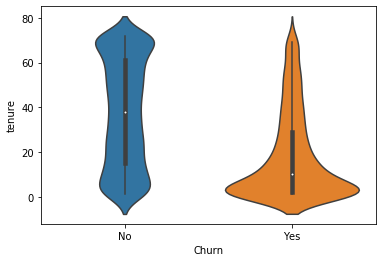

In [17]:
sns.violinplot(x="Churn", y="tenure", data=numeric_ds);


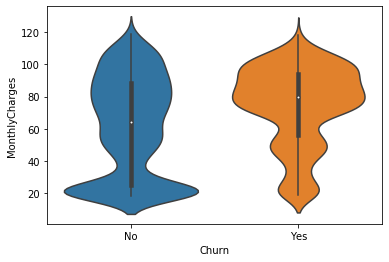

In [18]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=numeric_ds);


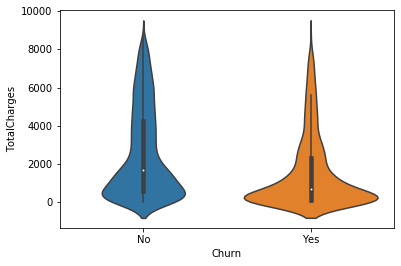

In [19]:
sns.violinplot(x="Churn", y="TotalCharges", data=numeric_ds);

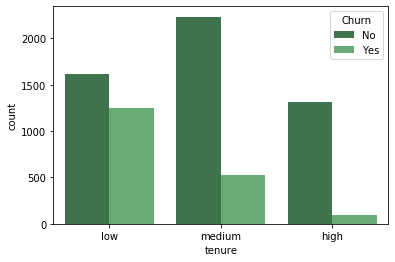

In [20]:
tenure_bins=pd.cut(numeric_ds["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

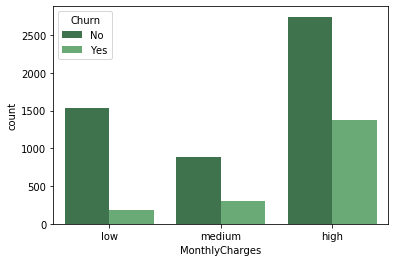

In [21]:
MonthlyCharges_bins=pd.cut(numeric_ds["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

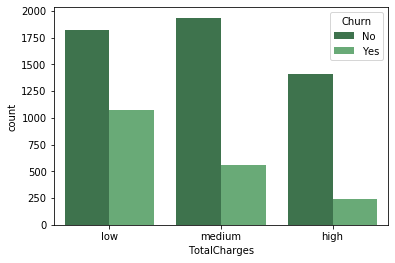

In [22]:
TotalCharges_bins=pd.cut(numeric_ds["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

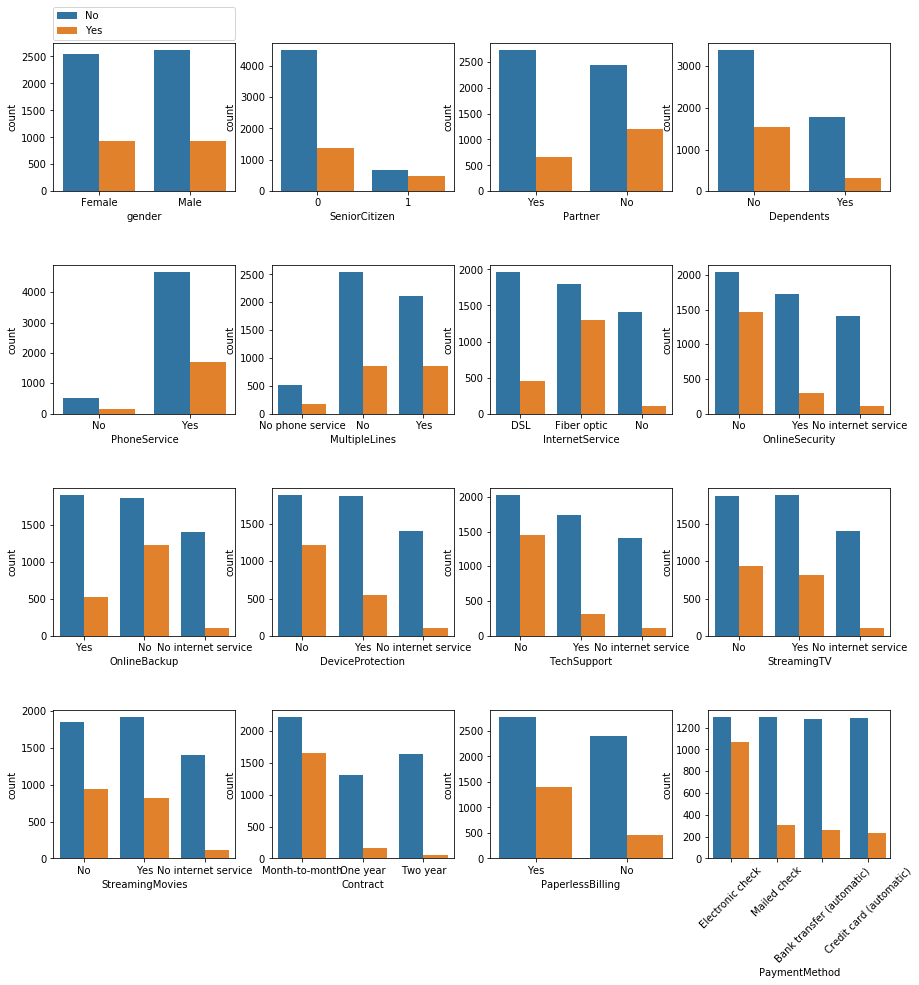

In [23]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

In [24]:
bins=pd.DataFrame([tenure_bins, MonthlyCharges_bins, TotalCharges_bins]).T 

In [25]:
bins

,tenure,MonthlyCharges,TotalCharges
0,low,low,low
1,medium,medium,medium
2,low,medium,low
3,medium,medium,medium
4,low,high,low
...,...,...,...
7038,medium,high,medium
7039,high,high,high
7040,low,low,low
7041,low,high,low


/Users/rithwikvamshi/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


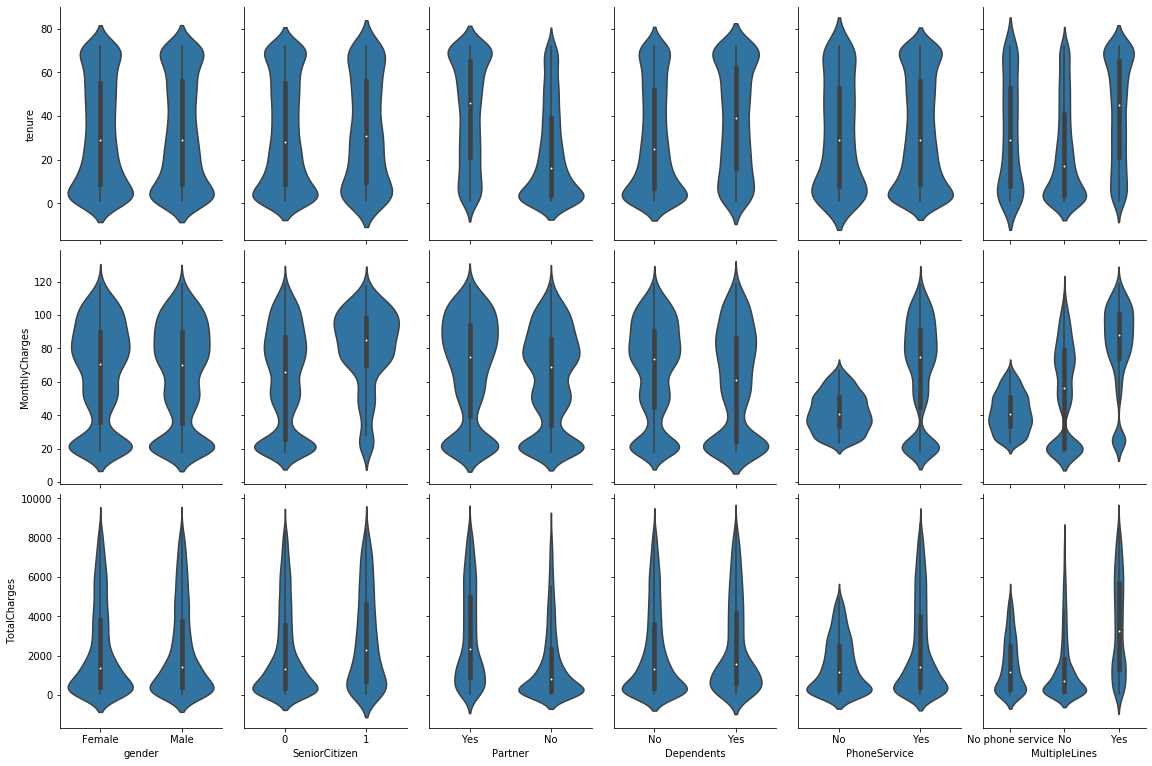

In [26]:
g = sns.PairGrid(data, x_vars=objects_ds.columns[0:6].values,
    y_vars=numeric_ds.columns[0:3].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

In [27]:
catdata=pd.concat([bins,objects_ds],axis=1)
catdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   tenure            7032 non-null   object  
 1   MonthlyCharges    7032 non-null   object  
 2   TotalCharges      7032 non-null   object  
 3   gender            7032 non-null   object  
 4   SeniorCitizen     7032 non-null   category
 5   Partner           7032 non-null   object  
 6   Dependents        7032 non-null   object  
 7   PhoneService      7032 non-null   object  
 8   MultipleLines     7032 non-null   object  
 9   InternetService   7032 non-null   object  
 10  OnlineSecurity    7032 non-null   object  
 11  OnlineBackup      7032 non-null   object  
 12  DeviceProtection  7032 non-null   object  
 13  TechSupport       7032 non-null   object  
 14  StreamingTV       7032 non-null   object  
 15  StreamingMovies   7032 non-null   object  
 16  Contract          7032 n

In [28]:
for i in list(catdata.columns):
    catdata[i] = pd.Categorical(catdata[i]) # Convert all the variables into categorical
 # Transform the categorical variables into binary vector
dummy = pd.get_dummies(catdata)

In [29]:
dummy.head()

,tenure_high,tenure_low,tenure_medium,MonthlyCharges_high,MonthlyCharges_low,MonthlyCharges_medium,TotalCharges_high,TotalCharges_low,TotalCharges_medium,gender_Female,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1


In [30]:
catdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   tenure            7032 non-null   category
 1   MonthlyCharges    7032 non-null   category
 2   TotalCharges      7032 non-null   category
 3   gender            7032 non-null   category
 4   SeniorCitizen     7032 non-null   category
 5   Partner           7032 non-null   category
 6   Dependents        7032 non-null   category
 7   PhoneService      7032 non-null   category
 8   MultipleLines     7032 non-null   category
 9   InternetService   7032 non-null   category
 10  OnlineSecurity    7032 non-null   category
 11  OnlineBackup      7032 non-null   category
 12  DeviceProtection  7032 non-null   category
 13  TechSupport       7032 non-null   category
 14  StreamingTV       7032 non-null   category
 15  StreamingMovies   7032 non-null   category
 16  Contract          7032 n

In [31]:
accuracy_scores=[] 

In [32]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,accuracy_score

In [33]:
features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns
X = dummy[features].values
Y = dummy["Churn_Yes"].values
validation_size = 0.20
seed = 7
xtrain,xtest, ytrain,ytest = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
LRalgo=LogisticRegression()

In [36]:
LRalgo.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
ypred=LRalgo.predict(xtest)

In [38]:
confusion_matrix(ytest,ypred)

array([[918,  99],
       [190, 200]])

In [39]:
accuracy_scores.append(accuracy_score(ytest,ypred))
accuracy_score(ytest,ypred)

0.7945984363894811

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
tree = DecisionTreeClassifier() 

model = tree.fit(xtrain,ytrain)

In [42]:
ypred=model.predict(xtest)

In [43]:
confusion_matrix(ytest,ypred)

array([[839, 178],
       [206, 184]])

In [44]:
accuracy_scores.append(accuracy_score(ytest,ypred))
accuracy_score(ytest,ypred)

0.7270788912579957

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
maxac=0
maxacpos=0
for i in range(1,100):
    algo=RandomForestClassifier(n_estimators=i)
    algo.fit(xtrain,ytrain)
    ypred=algo.predict(xtest)
    accuracy=accuracy_score(ytest,ypred)
    if accuracy > maxac:
        maxac=accuracy
        maxacpos=i

print(maxac)
print(maxacpos)

0.7953091684434968
75


In [47]:
accuracy_scores.append(maxac)

In [48]:
from sklearn.neural_network import MLPClassifier
algo=MLPClassifier(hidden_layer_sizes=(30,30,30),verbose=True,random_state=5)

In [49]:
algo.fit(xtrain,ytrain)

Iteration 1, loss = 0.58222169
Iteration 2, loss = 0.47410912
Iteration 3, loss = 0.44103261
Iteration 4, loss = 0.42973943
Iteration 5, loss = 0.42518348
Iteration 6, loss = 0.42408517
Iteration 7, loss = 0.42204200
Iteration 8, loss = 0.41839698
Iteration 9, loss = 0.41763569
Iteration 10, loss = 0.41563063
Iteration 11, loss = 0.41540811
Iteration 12, loss = 0.41435826
Iteration 13, loss = 0.41334168
Iteration 14, loss = 0.41197326
Iteration 15, loss = 0.41363640
Iteration 16, loss = 0.41144941
Iteration 17, loss = 0.40996381
Iteration 18, loss = 0.40919519
Iteration 19, loss = 0.40914570
Iteration 20, loss = 0.40814266
Iteration 21, loss = 0.40722457
Iteration 22, loss = 0.40739190
Iteration 23, loss = 0.40566857
Iteration 24, loss = 0.40614363
Iteration 25, loss = 0.40454708
Iteration 26, loss = 0.40491124
Iteration 27, loss = 0.40271333
Iteration 28, loss = 0.40119660
Iteration 29, loss = 0.40163180
Iteration 30, loss = 0.40368297
Iteration 31, loss = 0.39877165
Iteration 32, los

/Users/rithwikvamshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=5, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [50]:
ypred=algo.predict(xtest)

In [51]:
confusion_matrix(ytest,ypred)

array([[872, 145],
       [207, 183]])

In [52]:
accuracy_scores.append(accuracy_score(ytest,ypred))
accuracy_score(ytest,ypred)

0.749822316986496

In [53]:
from sklearn import svm

In [54]:
clf = svm.SVC(gamma='scale')

In [55]:
clf.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
ypred=clf.predict(xtest)

In [57]:
confusion_matrix(ytest,ypred)

array([[937,  80],
       [209, 181]])

In [58]:
accuracy_scores.append(accuracy_score(ytest,ypred))
accuracy_score(ytest,ypred)

0.7945984363894811

In [59]:
algorithms=["LogisticRegression","Decision_Tree","Random_Forest","Artificial_Neural_Networks","Support Vector Machine"]

In [60]:
accuracy_scores

[0.7945984363894811,
 0.7270788912579957,
 0.7953091684434968,
 0.749822316986496,
 0.7945984363894811]

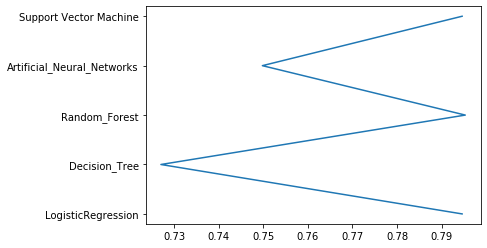

In [61]:
plt.plot(accuracy_scores,algorithms)